In [2]:
import os
import csv

import random
import numpy as np

from sklearn.metrics import matthews_corrcoef
from sklearn.manifold.t_sne import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from collections import OrderedDict


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
##Hierarchical clustering
def Hclust(data, min_cl, max_cl, metric):
    best_silh = 0
    for n in range(min_cl,max_cl,1):
        hclust = AgglomerativeClustering(n_clusters=n, 
                                         linkage='complete', 
                                         affinity=metric)
        tmp_label = hclust.fit_predict(data).tolist()
        tmp_silh = silhouette_score(data, tmp_label)
        if tmp_silh > best_silh:
            best_silh = tmp_silh
            n_clust = n
            label = tmp_label
    return n_clust, label

## Clustering CNN+AE encoded vectors

In [3]:
disease_folder = 'autism'
date_time_folder = '2018-11-20-17-20-33'
experiment_folder = 'autism2018-11-26-15-48-47'
data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease_folder, date_time_folder))

In [4]:
with open(os.path.expanduser('~/data1/complex_disorders/experiments/%s' % experiment_folder) + '/encoded_vect.csv') as f:
    rd = csv.reader(f)
    encoded_vect = []
    for r in rd:
        encoded_vect += [r]
for idx, e in enumerate(encoded_vect):
    encoded_vect[idx] = list(map(float, e))
        
with open(os.path.expanduser('~/data1/complex_disorders/experiments/%s' % experiment_folder) + '/mrns.csv') as f:
    rd = csv.reader(f)
    mrns = []
    for r in rd:
        mrns.append(r[0])

In [30]:
best_sil = 0.0
for n in range(4,80,1):
    hclust = AgglomerativeClustering(n_clusters=n, linkage='complete', affinity='l1')
    tmp_class = hclust.fit_predict(encoded_vect).tolist()
    tmp_score = silhouette_score(encoded_vect, tmp_class)
    if tmp_score > best_sil:
        print(tmp_score)
        best_sil = tmp_score
        n_clusters = n
        pred_class = tmp_class

0.11061874715694428
0.11609164021506839
0.11950110242609938
0.12083589887025345
0.12100912725704711
0.12156620693380588
0.12177636192123814


In [31]:
print("Number of clusters found:{0}".format(n_clusters))
print("Silhouette score:{0:.3f}".format(best_sil))

Number of clusters found:49
Silhouette score:0.122


In [202]:
##T-SNE
#encoded = encoded_vect.detach().cpu().numpy()
tsne = TSNE(n_components=2, n_iter=5000, perplexity=70, random_state=42)
X_tsne40 = tsne.fit_transform(encoded_vect)

In [203]:
with open(data_folder + '/cohort-mrn_diseases.csv') as f:
    rd = csv.reader(f)
    mrn_disease = {}
    for r in rd:
        mrn_disease[r[0]] = r[1::]
        
mrn_encoded_disease = []
for m in mrns:
    mrn_encoded_disease.append(mrn_disease[str(m)][0])

In [204]:
colormap = {'autism':'blue', 'active disintegrative psychosis':'purple', 'psychosis with origin in childhood':'green', 'pervasive developmental disorder':'yellow' }
colors = [colormap[v] for v in mrn_encoded_disease]

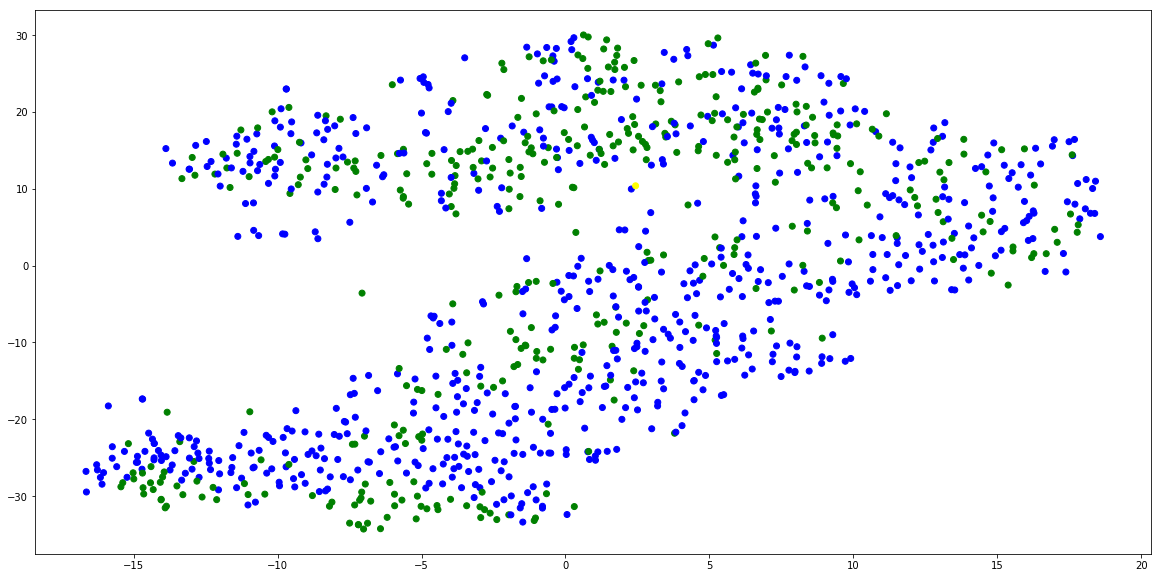

In [205]:
plt.figure(figsize=(20,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)

In [190]:
### 12:"olive",
colormap = {
#     18:"darkgreen", 17:"dodgerblue", 16:"maroon", 15:"peru", 
    14:"darkorchid", 
    13:"blueviolet", 12:"olive", 
    11:"purple", 10:"wheat", 9:"yellowgreen", 
    8:"turquoise", 7:"lavender", 6:"grey", 5:"fuchsia", 
    4:"pink", 3: "red", 2: 'orange', 
    1: 'green', 0: 'blue'}
colors = [colormap[v] for v in pred_class]

([], <a list of 0 Text yticklabel objects>)

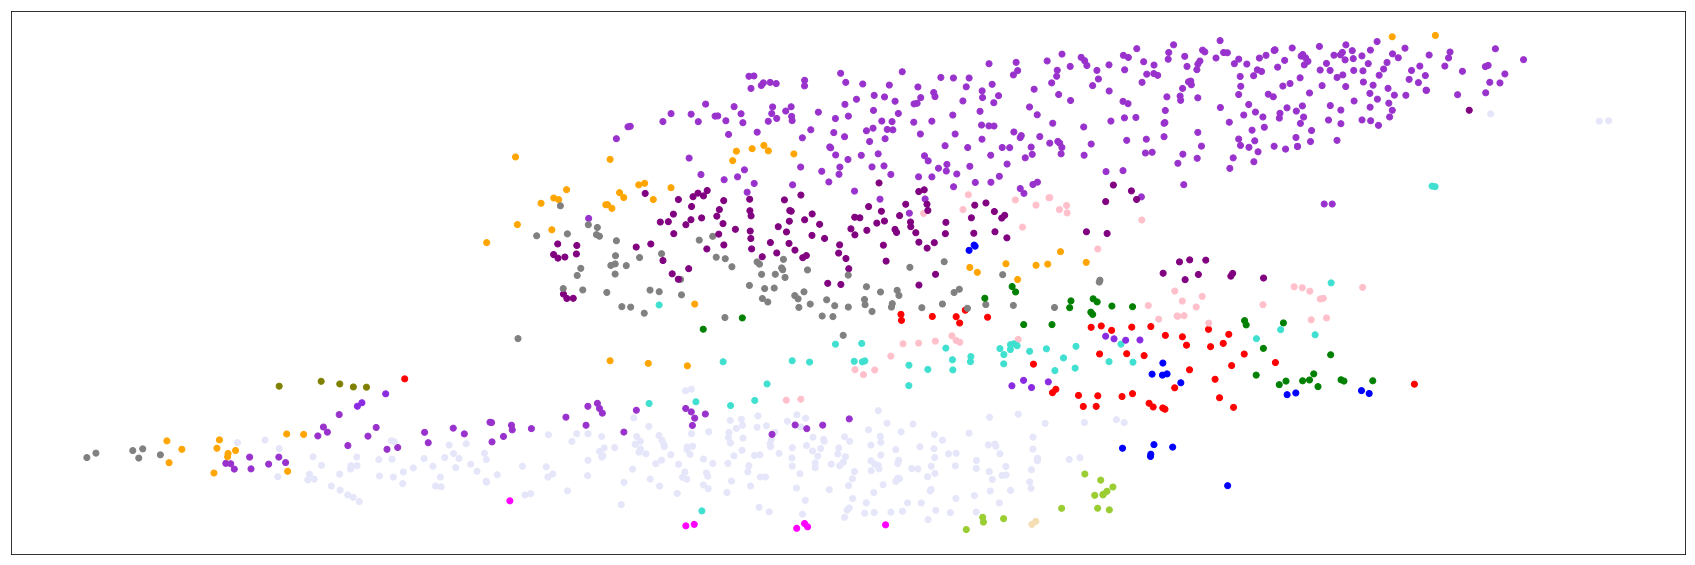

In [191]:
plt.figure(figsize=(30,10))
plt.scatter(X_tsne40[:,0], X_tsne40[:,1], c=colors)
plt.xticks([])
plt.yticks([])

In [206]:
def FreqDict(tokens):
    freq_dict = {}
    for seq in tokens:
        for s in seq:
            if s not in freq_dict:
                freq_dict[s] = 1
            else:
                freq_dict[s] += 1
    return freq_dict

In [255]:
encoded_groups = OrderedDict()
encoded_seq = OrderedDict()
for i in range(n_clusters):
    encoded_groups[i] = []
    encoded_seq[i] = []
    for j in range(len(pred_class)):
        if pred_class[j] == i:
            encoded_groups[i] += [mrns[j]]
            encoded_seq[i].append([rd for rd in raw_data[j] if rd!=0])
                
for cl in range(n_clusters):
    encoded_count = FreqDict(encoded_seq[cl])

    MFMT = max(encoded_count, key=(lambda key: encoded_count[key]))
    num_MFMT = 0
    for el in raw_data:
        for t in el:
            if t == MFMT:
                num_MFMT += 1
    new_vocab[str(MFMT)]
    
    print("Cluster {0} -- Relative numerosity of first most frequent term:{1} = {2:.2f}".format(cl,new_vocab[str(MFMT)], encoded_count[MFMT]/num_MFMT))

    encoded_count.pop(MFMT)
    MFMT2 = max(encoded_count, key=(lambda key: encoded_count[key]))
    num_MFMT2 = 0
    for el in raw_data:
        for t in el:
            if t == MFMT2:
                num_MFMT2 += 1
    new_vocab[str(MFMT2)]
    

    print("Cluster {0} -- Relative numerosity of second most frequent term:{1} = {2:.2f}".format(cl,new_vocab[str(MFMT2)], encoded_count[MFMT2]/num_MFMT2))
    
    encoded_count.pop(MFMT2)
    MFMT3 = max(encoded_count, key=(lambda key: encoded_count[key]))
    num_MFMT3 = 0
    for el in raw_data:
        for t in el:
            if t == MFMT3:
                num_MFMT3 += 1
    new_vocab[str(MFMT3)]
    

    print("Cluster {0} -- Relative numerosity of third most frequent term:{1} = {2:.2f}".format(cl,new_vocab[str(MFMT3)], encoded_count[MFMT3]/num_MFMT3))
    
    encoded_count.pop(MFMT3)
    MFMT4 = max(encoded_count, key=(lambda key: encoded_count[key]))
    num_MFMT4 = 0
    for el in raw_data:
        for t in el:
            if t == MFMT4:
                num_MFMT4 += 1
    new_vocab[str(MFMT4)]
    

    print("Cluster {0} -- Relative numerosity of third most frequent term:{1} = {2:.2f}\n".format(cl,new_vocab[str(MFMT4)], encoded_count[MFMT4]/num_MFMT4))

Cluster 0 -- Relative numerosity of first most frequent term:icd9::Autistic disorder, current or active state::299.00::C0154446 = 0.02
Cluster 0 -- Relative numerosity of second most frequent term:icd9::Routine infant or child health check::V20.2::C0260545 = 0.02
Cluster 0 -- Relative numerosity of third most frequent term:icd9::Asthma, unspecified type, unspecified::493.90::C0155886 = 0.03
Cluster 0 -- Relative numerosity of third most frequent term:icd9::Epilepsy, unspecified, without mention of intractable epilepsy::345.90::C0154721 = 0.05

Cluster 1 -- Relative numerosity of first most frequent term:icd9::Routine infant or child health check::V20.2::C0260545 = 0.04
Cluster 1 -- Relative numerosity of second most frequent term:icd9::Autistic disorder, current or active state::299.00::C0154446 = 0.03
Cluster 1 -- Relative numerosity of third most frequent term:icd9::Unspecified pervasive developmental disorder, current or active state::299.90::C0154453 = 0.02
Cluster 1 -- Relative nu

## Raw data

In [10]:
with open( data_folder + '/cohort-new_ehr.csv') as f:
    rd = csv.reader(f)
    raw_ehr = {}
    for r in rd:
        raw_ehr.setdefault(r[0], list()).extend(list(map(int, r[1::])))

In [11]:
##padded raw data
raw_data = []
max_len = 0
for _, e in raw_ehr.items():
    raw_data.append(e)
    if len(e) >= max_len:
        max_len = len(e)
for idx, s in enumerate(raw_data):
    raw_data[idx] = s + [0]*(max_len-len(s))

In [242]:
scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(raw_data)

In [243]:
best_sil = 0.0
for n in range(4,20,1):
    hclust = AgglomerativeClustering(n_clusters=n, linkage='complete')
    tmp_class = hclust.fit_predict(raw_data_scaled).tolist()
    tmp_score = silhouette_score(raw_data_scaled, tmp_class)
    print(tmp_score)
    if tmp_score > best_sil:
        best_sil = tmp_score
        n_clusters = n
        pred_class = tmp_class
print("Number of clusters found:{0}".format(n_clusters))
print("Silhouette score:{0:.3f}".format(best_sil))

0.9213020009511741
0.9149956289926906
0.8885777645233016
0.8566091180070083
0.8188793463953482
0.8186972194333872
0.8186636301412067
0.8121372273424818
0.8119071727223206
0.7450105359253124
0.7448942628725741
0.7447428079674728
0.7446260218482008
0.744461899401664
0.7405310150335669
0.740391965471831
Number of clusters found:4
Silhouette score:0.921


In [57]:
# ##T-SNE
X_tsne50_raw = tsne.fit_transform(raw_data_scaled)

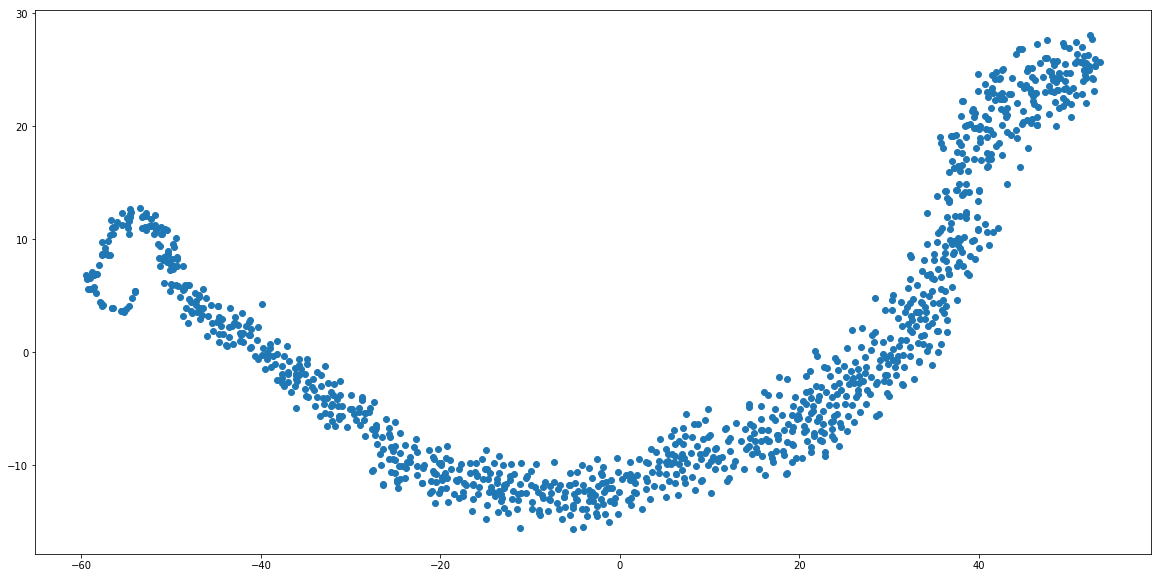

In [58]:
plt.figure(figsize=(20,10))
plt.scatter(X_tsne50_raw[:,0], X_tsne50_raw[:,1])

## Count data

In [12]:
with open( data_folder + '/cohort-new_vocab.csv') as f:
    rd = csv.reader(f)
    next(rd)
    new_vocab = {}
    for r in rd:
        new_vocab[r[1]] = r[0]
        
len_vocab = len(new_vocab)

In [13]:
def svd_tfidf(data, len_vocab):
    
    count_mat = np.zeros((len(data), len_vocab))
    
    for idx, token_list in enumerate(data):
        for t in token_list:
            if t != 0:
                count_mat[idx, t-1] += 1
                
    tfidf = TfidfTransformer()
    tfidf_mat = tfidf.fit_transform(count_mat)
    
    svd = TruncatedSVD(n_components=32)
    svd_mat = svd.fit_transform(tfidf_mat)
    
    return svd_mat

In [14]:
svd_mat = svd_tfidf(raw_data, len_vocab)

In [32]:
best_sil = 0.0
for n in range(4,80,1):
    hclust = AgglomerativeClustering(n_clusters=n, linkage='complete', affinity='cosine')
    tmp_class = hclust.fit_predict(svd_mat).tolist()
    tmp_score = silhouette_score(svd_mat, tmp_class)
    if tmp_score > best_sil:
        print(tmp_score)
        best_sil = tmp_score
        n_clusters = n
        pred_class = tmp_class
print("Number of clusters found:{0}".format(n_clusters))
print("Silhouette score:{0:.3f}".format(best_sil))

0.0006207715128192053
0.010498270687188484
0.0165598710800405
0.02133769923569294
0.03269218335447421
0.03865577902791185
0.047043453302569836
0.05052170858752373
0.05083926049788957
0.061561983764108145
0.07087607483173547
0.07698675554418906
0.0831467540026267
0.08368936147881495
0.08674902172270142
0.0896881538650949
0.09542160911663805
0.09951070652262223
0.1011447688143498
Number of clusters found:36
Silhouette score:0.101


In [220]:
# ##T-SNE
X_tsne50_count = tsne.fit_transform(svd_mat)

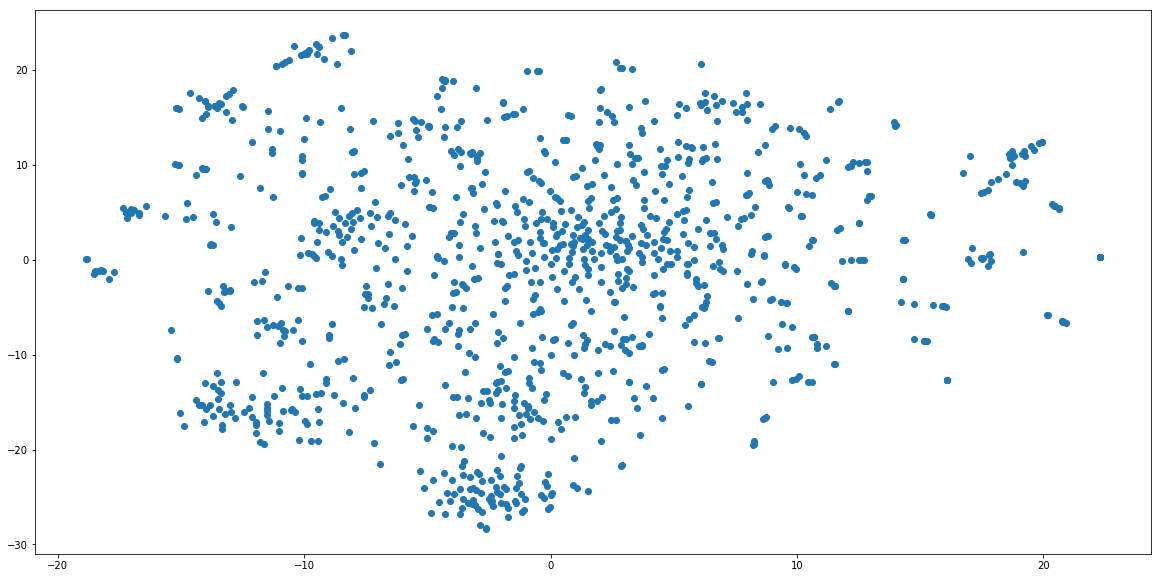

In [221]:
plt.figure(figsize=(20,10))
plt.scatter(X_tsne50_count[:,0], X_tsne50_count[:,1])